In [50]:
# import sklearn

# 1.1 Метрика качества. Определения

In [51]:
# Метрика качества – это способ численно оценить модель на основе её предсказаний

In [52]:
# Функции с суффиксом _score 
# измеряют качество модели, основываясь на том, насколько хорошо модель выполняет свою задачу. 
# Эти функции возвращают чем больше, тем лучше: чем выше значение, тем более эффективна модель. 
# Как правило, такие функции применяются для оценки производительности модели на тестовых данных или в процессе кросс-валидации.

# Основная идея: метрики с суффиксом _score оценивают положительные аспекты модели, 
# и их значения варьируются в пределах от 0 до 1 (или, в случае регрессии, от минус бесконечности до некоторого максимума), 
# где чем выше, тем лучше.

In [53]:
# Функции с суффиксом _loss или _error, 
# наоборот, измеряют ошибки модели, то есть то, насколько плохо модель работает. 
# Эти функции возвращают чем меньше, тем лучше: минимизация потерь является целью обучения модели.

# Основная идея: метрики с суффиксом _loss или _error оценивают потери или ошибки, 
# и их значения варьируются от нуля (идеальное предсказание) до бесконечности, 
# где чем меньше значение, тем лучше модель.

In [54]:
# Таким образом, функции с суффиксом _score ориентированы на оценку успешности модели, 
# а функции с суффиксом _loss /_error измеряют потери и ошибки. 
# Их выбор зависит от контекста – обучения модели или её оценки.

In [55]:
# 1. Бинарная классификация:

# Суть: В задачах бинарной классификации каждый объект может быть отнесён к одному из двух классов. 
# Это наиболее простой и интуитивно понятный случай классификации.
# Пример: Классификация писем на "спам" или "не спам", диагностика болезни: "болен" или "здоров".
 

# 2. Многоклассовая классификация (multiclass classification):

# Суть: В задачах многоклассовой классификации каждый объект может принадлежать к одному из нескольких (трёх или более) классов. 
# При этом каждый объект относится только к одному классу.
# Пример: Распознавание цифр (0-9), предсказание типа животного (собака, кошка, птица).
 

# 3. Классификация с несколькими метками (multilabel classification):

# Суть: В задачах с несколькими метками каждый объект может принадлежать одновременно нескольким классам. 
# Это усложняет задачу, так как для каждого объекта нужно предсказать не одну метку, а набор меток.
# Пример: Тегирование фотографий, где изображение может содержать одновременно несколько объектов (например, "кошка", "дерево", "здание").

# 1.2 accuracy_score()

In [56]:
# Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, 
# насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

# accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

# Звёздочка (*) в сигнатуре функции accuracy_score() (и других функций в Python) означает, 
# что все параметры, которые следуют за ней, должны передаваться только по имени. 
# То есть такие аргументы нельзя передать позиционно, их нужно указывать явно по имени.

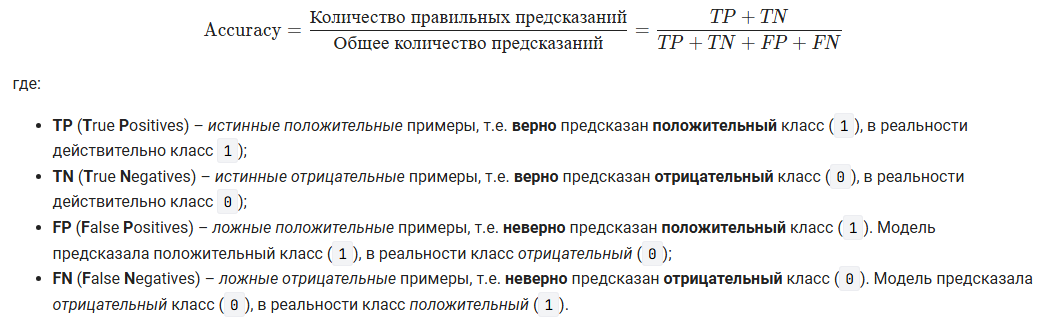

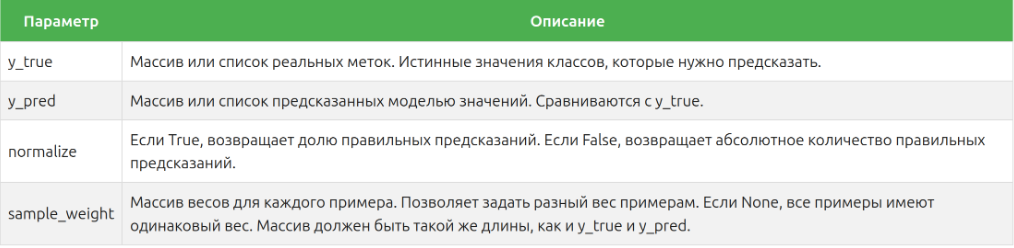

In [57]:
# Рассчитайте метрику accuracy при условии, что 
# положительный класс (1) имеет вес = 2, 
# а отрицательный класс (0) имеет вес = 1

from sklearn.metrics import accuracy_score
import numpy as np

y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weight = np.where(np.array(y_true) == 1, 2, 1)
accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [58]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = [weights[y] for y in y_true]

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [59]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = list(map(lambda x: weights[x], y_true))

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)
accuracy2 = accuracy_score(y_true, y_pred, sample_weight=sample_weight, normalize=False)

print(f'Accuracy: {accuracy:.2f}')
print(f'Количество правильных предсказаний: {accuracy2}')

Accuracy: 0.68
Количество правильных предсказаний: 13.0


# 1.3  confusion_matrix()

In [60]:
# Матрица ошибок представляет собой квадратную таблицу, 
# в которой отображается количество предсказанных и фактических классов для классификационной модели. 
# В этой матрице строки представляют истинные классы (реальные метки), 
# а столбцы представляют предсказанные классы (метки, которые предсказала модель). 
# Размер матрицы соответствует количеству классов.

# confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

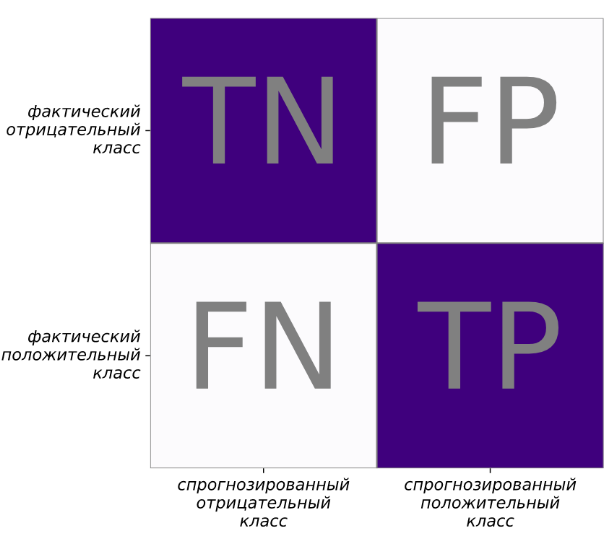

In [61]:
# В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

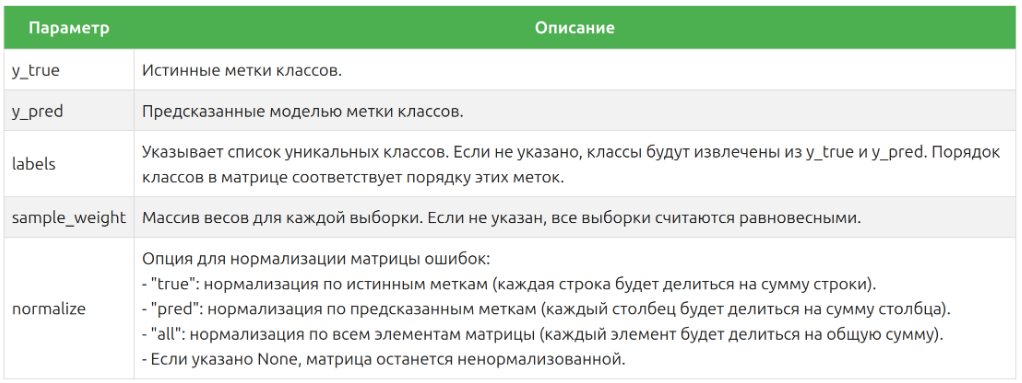

In [62]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

In [63]:
y_true = [0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1, 0],
       [1, 5, 0],
       [2, 1, 1]], dtype=int64)

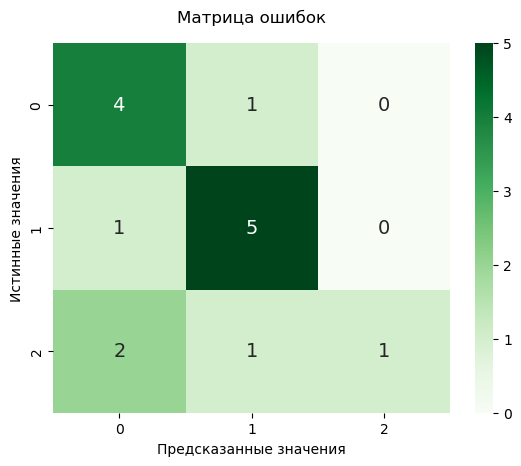

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение тепловой карты
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [65]:
# Параметр labels функции confusion_matrix() 
# позволяет задать порядок классов, для которых будет построена матрица ошибок, 
# а также указать, какие именно классы включить в матрицу.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, labels=['лошадь', 'корова'])
cm

array([[3, 1],
       [2, 1]], dtype=int64)

In [66]:
# Параметр normalize функции confusion_matrix() управляет нормализацией матрицы ошибок. 
# Нормализация позволяет представить значения в относительных долях или процентах, а не в абсолютных значениях.

cm = confusion_matrix(y_true, y_pred, normalize='true')
cm

array([[0.33333333, 0.        , 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.25      , 0.        , 0.75      ]])

In [67]:
# Вариант normalize='pred' нормализует по предсказанным меткам, то есть по столбцам.
# Каждый элемент матрицы делится на сумму элементов своей колонки. 
# Это позволяет видеть, насколько уверенно модель классифицирует примеры в каждый класс. 
# Например, если модель часто ошибочно предсказывает какой-то класс, 
# это будет отражено высокой нормализованной долей в этой колонке.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm

array([[0.5, 0. , 0.4],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.6]])

In [68]:
# Если normalize='all', то происходит нормализация по всей матрице, 
# то есть каждый элемент делится на общее количество предсказаний. 
# Таким образом, каждый элемент матрицы отражает долю всех предсказаний, которые попали в конкретную ячейку. 
# Это даёт общее представление о том, насколько часто модель делает правильные предсказания или ошибается.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='all')
cm

array([[0.11111111, 0.        , 0.22222222],
       [0.        , 0.22222222, 0.        ],
       [0.11111111, 0.        , 0.33333333]])

In [ ]:
# Воспользуемся данными датасета digits библиотеки scikit-learn.

# В датасете digits содержатся изображения рукописных цифр (от 0 до 9) размером 8x8 пикселей, 
# и каждый пиксель изображения представлен числовым значением интенсивности (оттенка серого). 
# Столбцы с именами pixel_0_0, pixel_0_1, ..., pixel_7_7 представляют собой значения интенсивности пикселей в этих изображениях.

# Столбцы названы в формате pixel_<row>_<col>, где <row> – это индекс строки (от 0 до 7), а <col> – индекс столбца (от 0 до 7).

# Каждое значение в этих столбцах – это числовое значение интенсивности пикселя, обычно в диапазоне от 0 до 16, где:

# 0 представляет собой белый цвет (отсутствие чернил).
# 16 представляет собой чёрный цвет (полностью закрашенный пиксель).


import pandas as pd
from sklearn.datasets import load_digits

# Загрузка датасета digits
digits = load_digits()

# Преобразование данных в DataFrame
# digits.data содержит массив с признаками, а digits.target - целевые значения
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# Добавление колонки с метками классов
df['target'] = digits.target

# Просмотр последних 5 строк DataFrame
display(df.tail())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


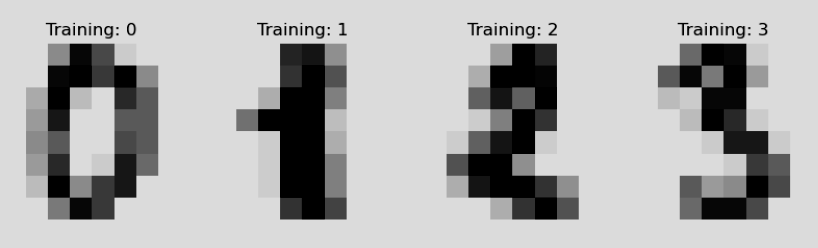

In [74]:
# Разделим данные на признаки и целевую переменную:

X = df.drop('target', axis=1)
y = df['target']

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [75]:
# Далее разделим данные на обучающие и тестовые выборки:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# ля демонстрации работы функции confusion_matrix() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), 
# затем обучим модель и сделаем предсказания, 
# а далее при помощи функции confusion_matrix() сформируем матрицу ошибок и выведем её на печать:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


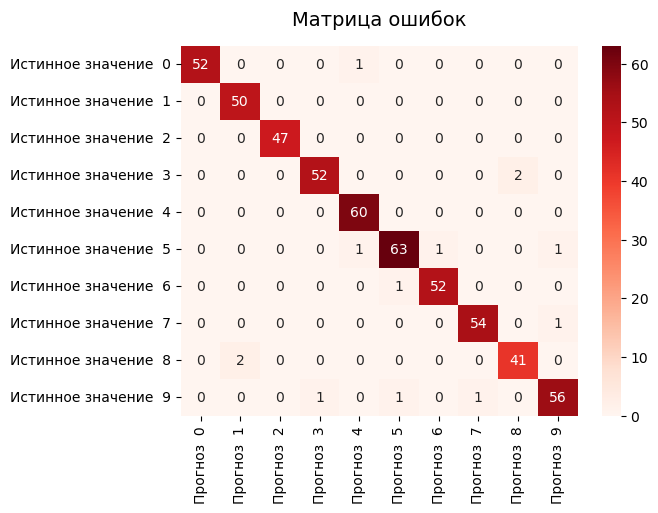

In [77]:
# Для более наглядного отображения матрицы ошибок, построим тепловую карту:

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[f'Прогноз  {i}' for i in range(10)],
            yticklabels=[f'Истинное значение  {i}' for i in range(10)])
plt.title('Матрица ошибок', pad=15, fontsize=14)
plt.show()

In [82]:
y_true = [1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1]  # Истинные метки классов
y_pred = [2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[1 2 0]
 [2 3 2]
 [1 1 3]]


# 1.4 multilabel_confusion_matrix()